In [2]:
!pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.0/72.0 MB 6.3 MB/s eta 0:00:12
   - -------------------------------------- 2.4/72.0 MB 5.6 MB/s eta 0:00:13
   -- ------------------------------------- 3.7/72.0 MB 5.9 MB/s eta 0:00:12
   -- ------------------------------------- 5.0/72.0 MB 5.9 MB/s eta 0:00:12
   --- ------------------------------------ 6.3/72.0 MB 6.0 MB/s eta 0:00:11
   ---- ----------------------------------- 7.3/72.0 MB 6.0 MB/s eta 0:00:11
   ---- ----------------------------------- 8.7/72.0 MB 6.0 MB/s eta 0:00:11
   ----- ---------------------------------- 10.0/72.0 MB 6.0 MB/s eta 0:00:11
   ------ --------------------------------- 11.3/72.0 MB 6.0 MB/s eta 0:00:11
   ------ --------------------------------- 12.6/72.0 MB 6.0 MB/s eta 0:00:10
   ------- -------------------------------- 13.9/72.0 MB 6.0 MB/s eta 0:00:10
   ------

In [5]:
!pip install openpyxl



   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]



In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor

In [7]:
train = pd.read_excel("data/train.xlsx")
test = pd.read_excel("data/test.xlsx")

In [8]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("\nTrain columns:\n", train.columns)

Train shape: (16209, 21)
Test shape: (5404, 20)

Train columns:
 Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [9]:
features = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "grade",
    "view",
    "waterfront",
    "lat",
    "long"
]

In [10]:
X = train[features]
y = train["price"]
X_test = test[features]

X = X.fillna(X.median())
X_test = X_test.fillna(X.median())

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [12]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
tabular_model = XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

tabular_model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [16]:
val_preds = tabular_model.predict(X_val)

rmse_tab = np.sqrt(mean_squared_error(y_val, val_preds))
r2_tab = r2_score(y_val, val_preds)

In [17]:
print("Tabular RMSE:", rmse_tab)
print("Tabular R²:", r2_tab)

Tabular RMSE: 124433.16753984848
Tabular R²: 0.8766133785247803


In [18]:
import os
os.makedirs("images", exist_ok=True)


In [19]:
import requests
from PIL import Image
from io import BytesIO

In [63]:
import os

MAPBOX_TOKEN = os.getenv("MAPBOX_TOKEN")

def fetch_satellite_image(lat, lon, save_path):
    url = (
        f"https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/"
        f"{lon},{lat},18/224x224?access_token={MAPBOX_TOKEN}"
    )
    response = requests.get(url, timeout=10)

    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        img.save(save_path)
        return True
    return False


In [21]:
max_images = 1000
count = 0

for _, row in train.iterrows():
    if count >= max_images:
        break

    img_id = row["id"]
    lat = row["lat"]
    lon = row["long"]

    save_path = f"images/{img_id}.png"

    if not os.path.exists(save_path):
        if fetch_satellite_image(lat, lon, save_path):
            count += 1

print(f"Downloaded {count} satellite images")


KeyboardInterrupt: 

In [22]:
len(os.listdir("images"))


504

In [24]:
!pip install torch torchvision torchaudio

   ---------------------------------------- 0.0/111.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/111.0 MB 6.7 MB/s eta 0:00:17
    --------------------------------------- 1.8/111.0 MB 6.3 MB/s eta 0:00:18
   - -------------------------------------- 3.1/111.0 MB 5.8 MB/s eta 0:00:19
   - -------------------------------------- 4.5/111.0 MB 6.0 MB/s eta 0:00:18
   - -------------------------------------- 5.2/111.0 MB 5.3 MB/s eta 0:00:20
   -- ------------------------------------- 6.8/111.0 MB 5.9 MB/s eta 0:00:18
   -- ------------------------------------- 8.1/111.0 MB 5.9 MB/s eta 0:00:18
   --- ------------------------------------ 9.4/111.0 MB 5.9 MB/s eta 0:00:18
   --- ------------------------------------ 10.7/111.0 MB 5.9 MB/s eta 0:00:17
   ---- ----------------------------------- 12.1/111.0 MB 5.9 MB/s eta 0:00:17
   ---- ----------------------------------- 13.4/111.0 MB 6.0 MB/s eta 0:00:17
   ----- ---------------------------------- 14.7/111.0 MB 6.0 MB/s e

In [25]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import numpy as np
import os


In [26]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

resnet = models.resnet18(pretrained=True)
resnet.fc = torch.nn.Identity()  # remove classifier
resnet = resnet.to(device)
resnet.eval()


d:\Softwares\Conda\envs\ds\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Softwares\Conda\envs\ds\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\pratibha yadav/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


100.0%


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [27]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [28]:
image_embeddings = {}
image_dir = "images"

for img_name in os.listdir(image_dir):
    img_id = int(img_name.replace(".png", ""))
    img_path = os.path.join(image_dir, img_name)

    img = Image.open(img_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        embedding = resnet(img_tensor).cpu().numpy().flatten()

    image_embeddings[img_id] = embedding

print("Extracted embeddings:", len(image_embeddings))


Extracted embeddings: 504


In [29]:
import pandas as pd

emb_df = pd.DataFrame.from_dict(image_embeddings, orient="index")
emb_df.reset_index(inplace=True)
emb_df.rename(columns={"index": "id"}, inplace=True)

emb_df.head()


,id,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
0,1015000050,0.102349,1.131737,1.281056,0.046283,0.971070,0.252620,0.616968,1.069434,0.389163,...,0.716423,0.679034,0.127003,0.125129,0.000000,0.337044,2.378220,0.309672,0.069100,0.000000
1,1025039145,0.607980,0.068711,1.137596,0.247833,0.347334,0.003572,0.973928,0.088180,1.440120,...,0.260430,0.627087,0.440499,0.874551,0.148631,1.254324,2.273317,0.667029,0.653773,0.035205
2,1086100100,0.154122,0.461092,1.024903,0.086554,0.351453,0.067890,0.019015,0.247578,0.414599,...,0.230677,0.182851,0.097818,0.766416,0.007762,2.019686,0.999617,1.728150,0.251157,0.014118
3,1088020070,0.224279,0.933110,1.576136,0.205834,1.391791,0.512548,0.354598,0.985642,0.600066,...,0.102209,1.137597,0.991585,0.348095,0.103277,1.564599,1.846193,0.832673,0.285073,0.286497
4,1109000175,0.278128,0.246552,2.361786,0.208015,1.039850,0.178302,0.623482,0.320834,0.424300,...,0.388736,0.576402,0.522258,0.044458,0.066125,0.861469,1.313659,0.646420,0.016693,0.355262


In [30]:
# Merge only rows for which images exist
train_mm = train.merge(emb_df, on="id", how="inner")

print("Multimodal train shape:", train_mm.shape)


Multimodal train shape: (509, 533)


In [31]:
# Reuse same tabular features
tab_features = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "grade",
    "view",
    "waterfront",
    "lat",
    "long"
]

# Image feature columns (all numeric except id & tabular)
img_features = emb_df.columns.drop("id")

X_mm = train_mm[tab_features].join(train_mm[img_features])
y_mm = train_mm["price"]

# Fill any missing values
X_mm = X_mm.fillna(X_mm.median())


In [32]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_mm, y_mm, test_size=0.2, random_state=42
)


In [33]:
mm_model = XGBRegressor(
    n_estimators=400,
    max_depth=7,
    learning_rate=0.04,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

mm_model.fit(X_tr, y_tr)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [34]:
val_preds_mm = mm_model.predict(X_val)

rmse_mm = np.sqrt(mean_squared_error(y_val, val_preds_mm))
r2_mm = r2_score(y_val, val_preds_mm)

print("Multimodal RMSE:", rmse_mm)
print("Multimodal R²:", r2_mm)


Multimodal RMSE: 220702.07683662607
Multimodal R²: 0.6435177326202393


In [36]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
    --------------------------------------- 0.5/39.0 MB 8.2 MB/s eta 0:00:05
   - -------------------------------------- 1.8/39.0 MB 5.3 MB/s eta 0:00:08
   -- ------------------------------------- 2.9/39.0 MB 5.2 MB/s eta 0:00:07
   ---- ----------------------------------- 3.9/39.0 MB 5.2 MB/s eta 0:00:07
   ----- ---------------------------------- 5.2/39.0 MB 5.2 MB/s eta 0:00:07
   ------ --------------------------------- 6.0/39.0 MB 4.9 MB/s eta 0:00:07
   ------ --------------------------------- 6.8/39.0 MB 4.9 MB/s eta 0:00:07
   -------- ------------------------------- 7.9/39.0 MB 4.9 MB/s eta 0:00:07
   --------- ------------------------------ 8.9/39.0 MB 4.9 MB/s eta 0:00:07
   ---------- ----------------------------- 10.0/39.0 MB 4.9 MB/s eta 0:00:06
   ----------- ---------------------------- 11.0/39.0 MB 4.8 MB/s eta 0:00:06
   ------------ --------------------------- 11.8/39.0 MB 4.8 MB/s eta 0:00:06
   

In [37]:
import torch
import torch.nn.functional as F
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


Matplotlib is building the font cache; this may take a moment.


In [38]:
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        target_layer.register_forward_hook(self._save_activation)
        target_layer.register_backward_hook(self._save_gradient)

    def _save_activation(self, module, input, output):
        self.activations = output

    def _save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0]

    def generate(self, input_tensor):
        self.model.zero_grad()
        output = self.model(input_tensor)
        output.backward(torch.ones_like(output))

        weights = self.gradients.mean(dim=(2, 3), keepdim=True)
        cam = (weights * self.activations).sum(dim=1)

        cam = F.relu(cam)
        cam -= cam.min()
        cam /= cam.max() + 1e-8
        return cam


In [39]:
target_layer = resnet.layer4
gradcam = GradCAM(resnet, target_layer)


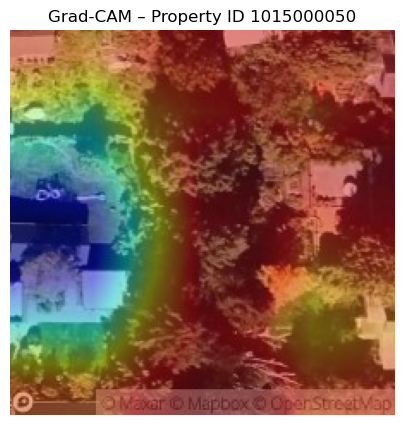

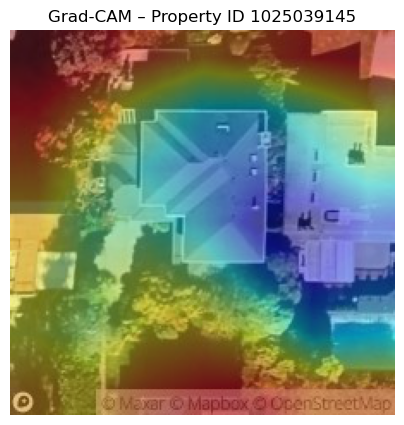

In [41]:
sample_ids = list(image_embeddings.keys())[:2]

for img_id in sample_ids:
    img_path = f"images/{img_id}.png"

    img = Image.open(img_path).convert("RGB")
    img_tensor = transform(img).unsqueeze(0).to(device)
    img_tensor.requires_grad = True

    cam = gradcam.generate(img_tensor)[0].detach().cpu().numpy()
    cam = cv2.resize(cam, (224, 224))

    img_np = np.array(img)
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(img_np, 0.6, heatmap, 0.4, 0)

    plt.figure(figsize=(5, 5))
    plt.imshow(overlay)
    plt.title(f"Grad-CAM – Property ID {img_id}")
    plt.axis("off")
    plt.show()


In [54]:
import os
os.makedirs("outputs", exist_ok=True)

In [55]:

test_mm = test.merge(emb_df, on="id", how="inner")

X_test_mm = test_mm[tab_features].join(test_mm[img_features])
X_test_mm = X_test_mm.fillna(X_test_mm.median())

print("Test multimodal samples:", X_test_mm.shape[0])

Test multimodal samples: 1


In [56]:
test_predictions = mm_model.predict(X_test_mm)

In [57]:
submission = pd.DataFrame({
    "id": test_mm["id"],
    "predicted_price": test_predictions
})

submission.to_csv("outputs/predictions.csv", index=False)
print("Saved to outputs/predictions.csv")


Saved to outputs/predictions.csv


In [52]:

test_df = pd.read_excel("data/test.xlsx")

test_ids = test_df["id"].values

trained_features = tabular_model.get_booster().feature_names

for col in trained_features:
    if col not in test_df.columns:
        test_df[col] = 0

X_test = test_df[trained_features]



In [53]:
test_predictions = tabular_model.predict(X_test)

submission = pd.DataFrame({
    "id": test_ids,
    "predicted_price": test_predictions
})

submission.to_csv("outputs/prediction.csv", index=False)

print("predictions.csv saved successfully")
print("Rows:", submission.shape[0])

predictions.csv saved successfully
Rows: 5404


In [58]:
import numpy as np

np.save(
    "image_embeddings.npy",
    emb_df.drop(columns=["id"]).values
)

emb_df.to_csv("image_embeddings.csv", index=False)

print("Image embedding files created successfully")


Image embedding files created successfully


In [59]:
import numpy as np
print(np.load("image_embeddings.npy").shape)

(504, 512)
